In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [71]:
with open("/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [72]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [73]:
with open("/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [74]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [75]:
# import dataset, we choos to work on only 10% of the dataset to save computational power 
path = "/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)

#applying previously built attack type columns
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


In [76]:
df.shape

(494021, 43)

In [77]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [78]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [79]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [80]:
#preprocessing and exploration
# categories 
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

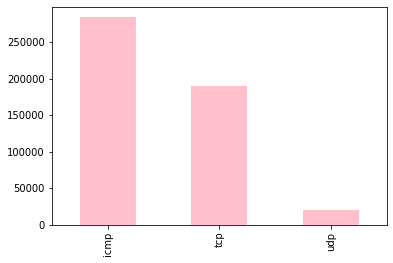

In [81]:
# feature distribution category protocol type
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar",color="pink")
bar_graph('protocol_type')

In [82]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

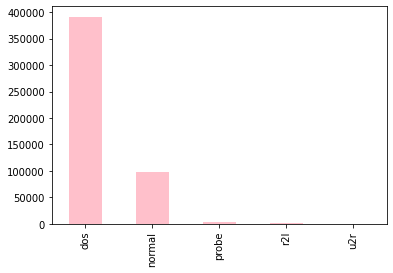

In [83]:
bar_graph('Attack Type')

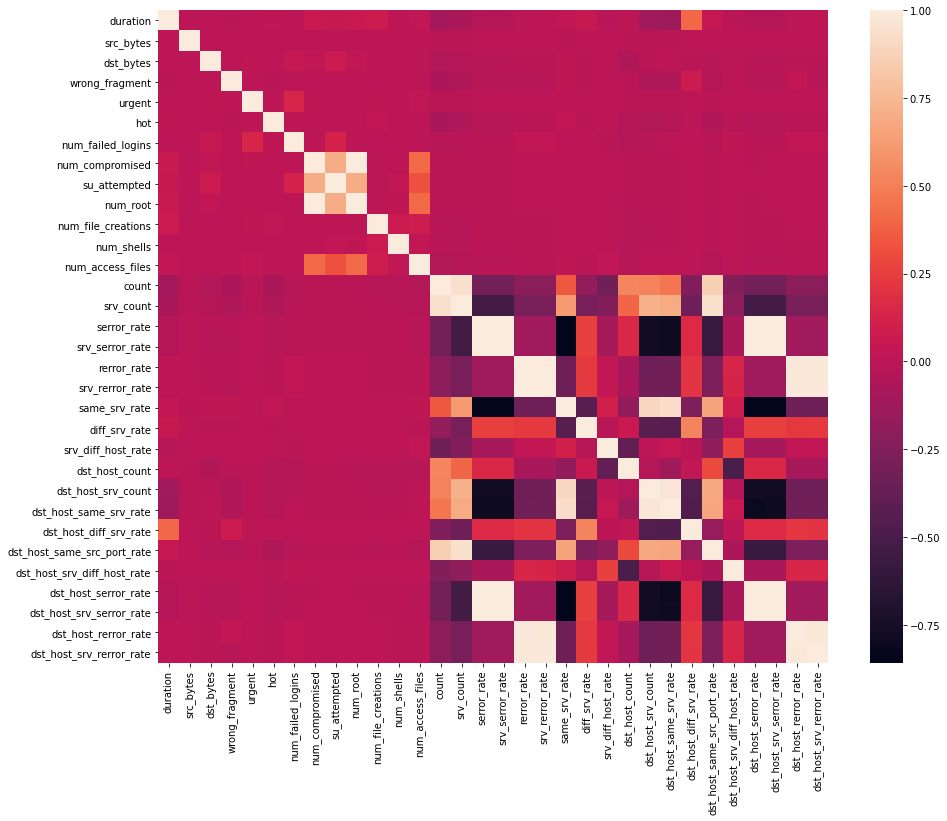

In [84]:
#data correlation
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 2]]# keep columns where there are more than 2 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [85]:
# dropping highly correlated columns

df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)
df.drop('service',axis = 1,inplace= True)
df = df.drop(['target',], axis=1)

In [86]:
df.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,tcp,SF,181,5450,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,tcp,SF,239,486,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


In [87]:
#features
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)


In [88]:

df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,SF,181,5450,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,1,SF,239,486,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,1,SF,235,1337,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,1,SF,219,1337,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,1,SF,217,2032,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


In [89]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [90]:

df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,1,0,239,486,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,1,0,235,1337,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,1,0,219,1337,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,1,0,217,2032,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(330994, 26) (163027, 26)
(330994, 1) (163027, 1)


In [92]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
clfd = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  1.014498233795166


In [93]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.06203341484069824


In [95]:
print("Decision tree Train score is:", clfd.score(X_train, y_train))
print("Decision tree Test score is:",clfd.score(X_test,y_test))

Decision tree Train score is: 0.9905829108684749
Decision tree Test score is: 0.9905230421954646


In [96]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators=30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("RF Training time: ",end_time-start_time)

RF Training time:  6.87580943107605


In [97]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()
print("RF Testing time: ",end_time-start_time)

RF Testing time:  0.04481768608093262


In [98]:
print("RF Train score is:", clfr.score(X_train, y_train))
print("RF Test score is:",clfr.score(X_test,y_test))

RF Train score is: 0.9999728091747887
RF Test score is: 0.9996074269906212


In [99]:
# SVM 
from sklearn.svm import SVC
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print(" SVM Training time: ",end_time-start_time)

Training time:  416.1533319950104


In [100]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  91.71869015693665


In [101]:
print(" SVM Train score is:", clfs.score(X_train, y_train))
print("SVM Test score is:",clfs.score(X_test,y_test))

 SVM Train score is: 0.9975014652833586
SVM Test score is: 0.9975341507848393


<BarContainer object of 3 artists>

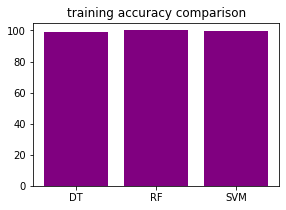

In [110]:
# TRAINING ACCURACY COMPARISON 
names = ['DT','RF','SVM']
values = [99.05,99.99,99.75]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.title("training accuracy comparison")
plt.bar(names,values,color="purple")

<BarContainer object of 3 artists>

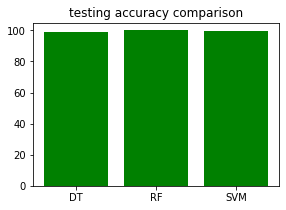

In [111]:
# TESTING ACCURACY COMPARISON
names = ['DT','RF','SVM']
values = [99.052,99.96,99.75]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.title("testing accuracy comparison")
plt.bar(names,values,color="green")

Text(0.5, 1.0, 'training time comparison')

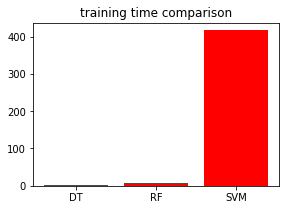

In [107]:
# TRAINING TIME
names = ['DT','RF','SVM']
values = [1.014,6.875,416.15]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values,color="red")
plt.title("training time comparison")

Text(0.5, 1.0, 'testing time comparison')

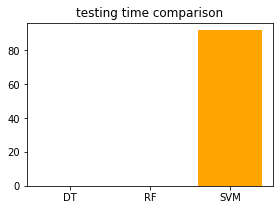

In [109]:
# TESTING TIME 
names = ['DT','RF','SVM']
values = [0.06,0.044,91.71]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values, color ="orange")
plt.title("testing time comparison")